In [399]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [401]:
data = pd.read_csv('smartphones.csv')
data.head()

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,...,refresh_rate,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto,resolution_width,resolution_height
0,oneplus,OnePlus 11 5G,54999,89.0,True,True,False,snapdragon,8.0,3.2,...,120,3,1.0,android,50.0,16.0,0,NaN,1440,3216
1,oneplus,OnePlus Nord CE 2 Lite 5G,19989,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,64.0,16.0,1,1024.0,1080,2412
2,samsung,Samsung Galaxy A14 5G,16499,75.0,True,False,False,exynos,8.0,2.4,...,90,3,1.0,android,50.0,13.0,1,1024.0,1080,2408
3,motorola,Motorola Moto G62 5G,14999,81.0,True,False,False,snapdragon,8.0,2.2,...,120,3,1.0,android,50.0,16.0,1,1024.0,1080,2400
4,realme,Realme 10 Pro Plus,24999,82.0,True,False,False,dimensity,8.0,2.6,...,120,3,1.0,android,108.0,16.0,0,NaN,1080,2412


In [275]:
print(data.columns)

Index(['brand_name', 'model', 'price', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'fast_charging_available', 'ram_capacity', 'internal_memory',
       'screen_size', 'refresh_rate', 'num_rear_cameras',
       'primary_camera_rear', 'extended_memory_available', 'resolution_width',
       'resolution_height'],
      dtype='object')


In [200]:
print("Dataset Overview: ")
print(data.info())

Dataset Overview: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 1005 non-null   object 
 1   model                      1005 non-null   object 
 2   price                      1005 non-null   int64  
 3   rating                     904 non-null    float64
 4   has_5g                     1005 non-null   bool   
 5   has_nfc                    1005 non-null   bool   
 6   has_ir_blaster             1005 non-null   bool   
 7   processor_brand            985 non-null    object 
 8   num_cores                  999 non-null    float64
 9   processor_speed            963 non-null    float64
 10  battery_capacity           994 non-null    float64
 11  fast_charging_available    1005 non-null   int64  
 12  fast_charging              794 non-null    float64
 13  ram_capacity               10

In [202]:
print("nDataset Description: ")
print(data.describe())

nDataset Description: 
               price      rating   num_cores  processor_speed  \
count    1005.000000  904.000000  999.000000       963.000000   
mean    32809.400000   78.349558    7.777778         2.430976   
std     39176.441073    7.431156    0.827064         0.461007   
min      3499.000000   60.000000    4.000000         1.200000   
25%     13489.000000   74.000000    8.000000         2.050000   
50%     19999.000000   80.000000    8.000000         2.360000   
75%     36999.000000   84.000000    8.000000         2.840000   
max    650000.000000   93.000000    8.000000         3.220000   

       battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
count        994.000000              1005.000000     794.000000   1005.000000   
mean        4822.031187                 0.857711      46.785894      6.617910   
std          998.307109                 0.349520      34.359086      2.765985   
min         1821.000000                 0.000000      10.000000    

In [204]:
data.duplicated().sum()

0

In [206]:
data.isnull().sum()

brand_name                     0
model                          0
price                          0
rating                       101
has_5g                         0
has_nfc                        0
has_ir_blaster                 0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
num_front_cameras              4
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
extended_upto                491
resolution_width               0
resolution_height              0
dtype: int64

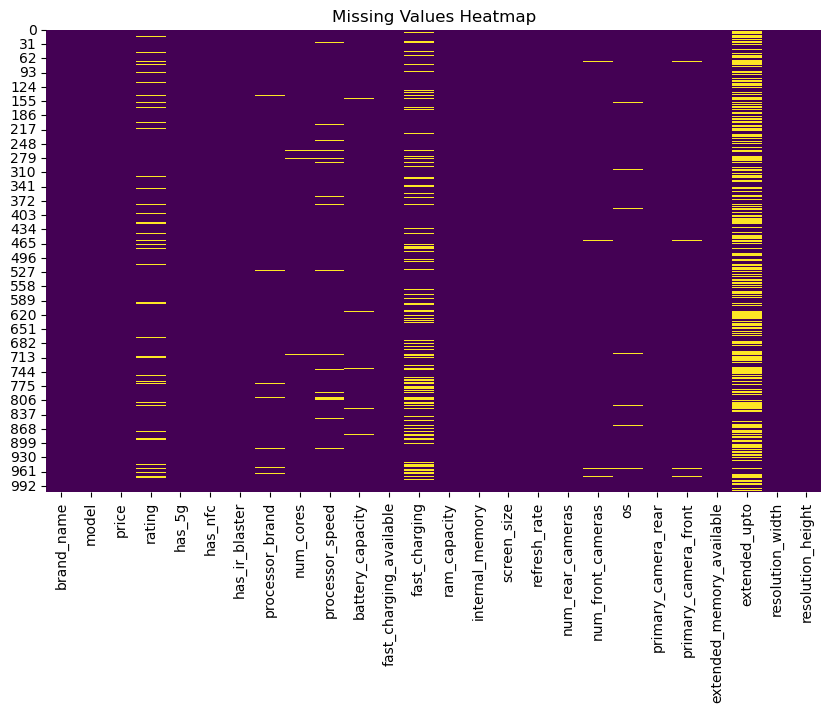

In [208]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar = False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [222]:
data_cleaned = data.dropna()

In [234]:
data = data.dropna(axis=1)
data.isnull().sum()

brand_name                   0
model                        0
price                        0
has_5g                       0
has_nfc                      0
has_ir_blaster               0
fast_charging_available      0
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
primary_camera_rear          0
extended_memory_available    0
resolution_width             0
resolution_height            0
dtype: int64

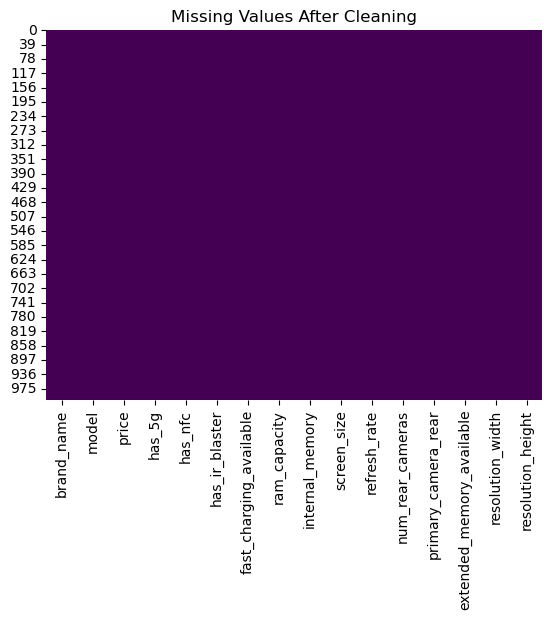

In [236]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values After Cleaning")
plt.show()

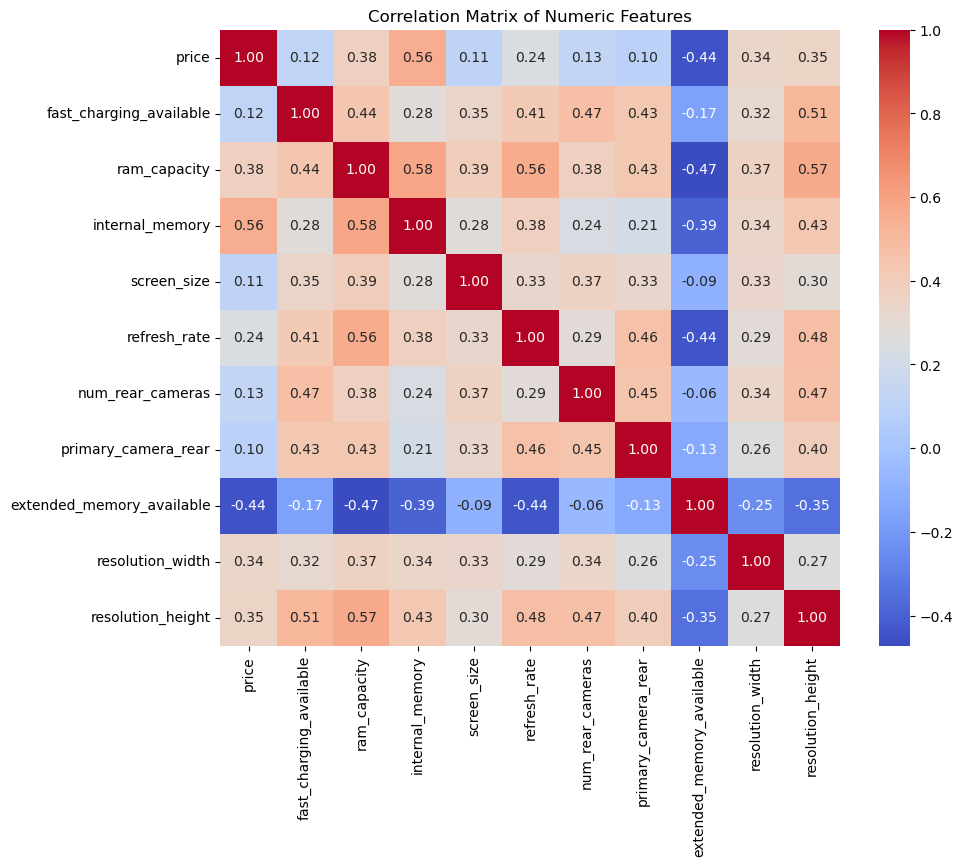

In [83]:
# Heatmap of correlation matrix

plt.figure(figsize=(10,8))

numeric_features = data.select_dtypes(include=["int64", "float64"])

correlation_matrix = numeric_features.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")

plt.title("Correlation Matrix of Numeric Features")
plt.show()


In [239]:
print(data.columns)

Index(['brand_name', 'model', 'price', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'fast_charging_available', 'ram_capacity', 'internal_memory',
       'screen_size', 'refresh_rate', 'num_rear_cameras',
       'primary_camera_rear', 'extended_memory_available', 'resolution_width',
       'resolution_height'],
      dtype='object')


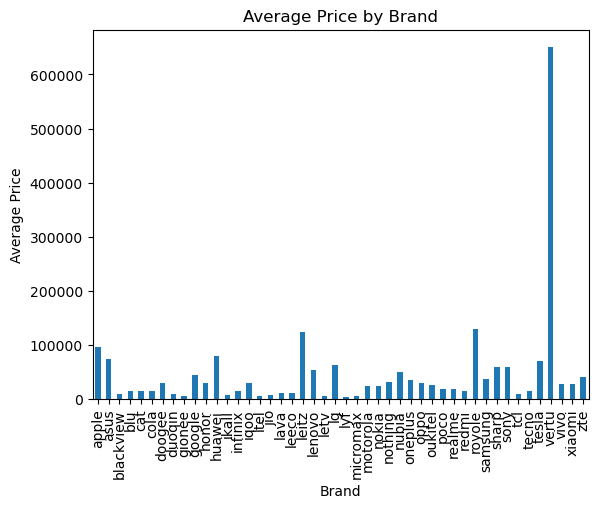

In [281]:
# Group by brand and calculate mean price
brand_price = data.groupby("brand_name")["price"].mean()

plt.figure()
brand_price.plot(kind='bar')
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.title("Average Price by Brand")
plt.show()


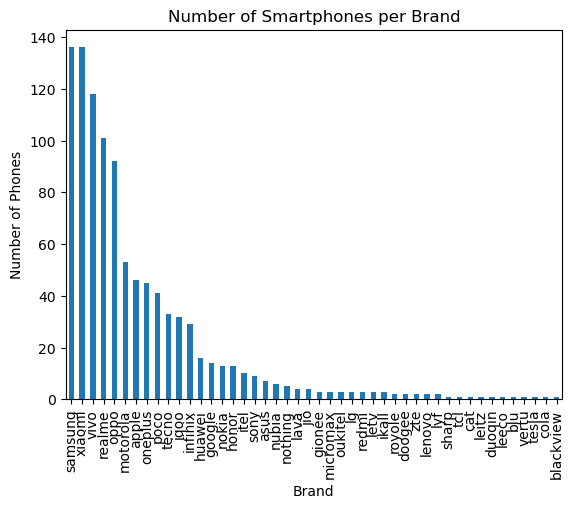

In [283]:
brand_count = data["brand_name"].value_counts()

plt.figure()
brand_count.plot(kind='bar')
plt.xlabel("Brand")
plt.ylabel("Number of Phones")
plt.title("Number of Smartphones per Brand")
plt.show()


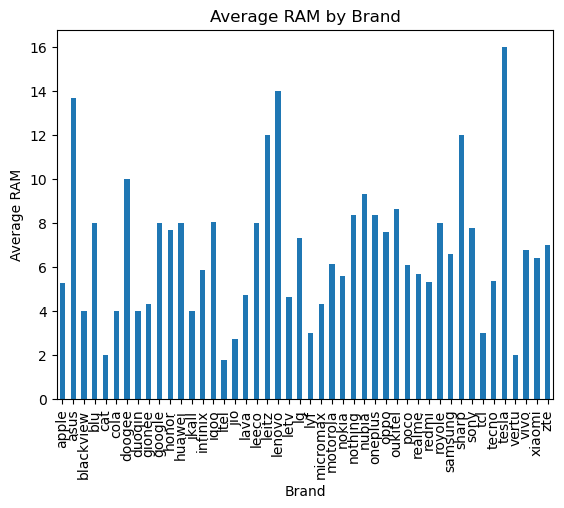

In [285]:
ram_by_brand = data.groupby("brand_name")["ram_capacity"].mean()

plt.figure()
ram_by_brand.plot(kind='bar')
plt.xlabel("Brand")
plt.ylabel("Average RAM")
plt.title("Average RAM by Brand")
plt.show()


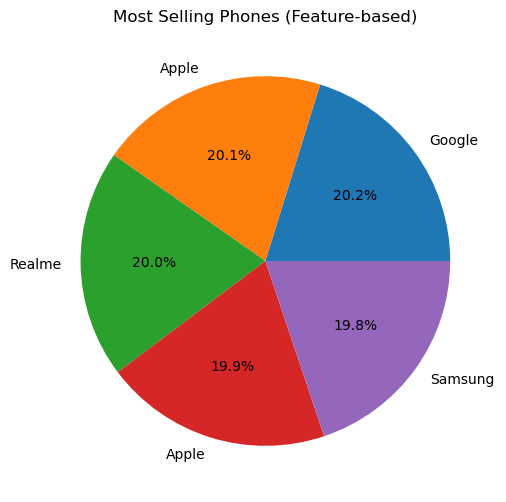

In [397]:
top5_models = (
    data.sort_values('price', ascending=False)
    .head(5)
    .set_index('brand')['price']
)

plt.figure(figsize=(6, 6))
top5_models.plot(kind='pie', autopct='%1.1f%%')
plt.ylabel("")
plt.title("Most Selling Phones (Feature-based)")
plt.show()

In [116]:
print(data.columns)

Index(['brand_name', 'model', 'price', 'has_5g', 'has_nfc', 'has_ir_blaster',
       'fast_charging_available', 'ram_capacity', 'internal_memory',
       'screen_size', 'refresh_rate', 'num_rear_cameras',
       'primary_camera_rear', 'extended_memory_available', 'resolution_width',
       'resolution_height'],
      dtype='object')


In [287]:
features = [
    'price', 'has_5g', 'has_nfc', 'has_ir_blaster', 
    'ram_capacity', 'internal_memory',
    'resolution_width', 'screen_size', 'refresh_rate', 
    'num_rear_cameras', 'primary_camera_rear'
]

data_clean = data.copy()

# Fill missing values
for col in features:
    if col in data_clean.columns and pd.api.types.is_numeric_dtype(data_clean[col]):
        data_clean.loc[:, col] = data_clean[col].fillna(data_clean[col].mean())
    elif col in data_clean.columns:
        # For non-numeric columns
        data_clean.loc[:, col] = data_clean[col].fillna(data_clean[col].mode()[0] if not data_clean[col].mode().empty else 0)

X = data_clean[features]
y = data_clean['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (804, 11)
Testing set size: (201, 11)


In [383]:
#KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_scaled, y)


KNeighborsRegressor()

In [385]:
#Decission Tree
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X, y)


DecisionTreeRegressor(random_state=42)

In [387]:
#Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)


RandomForestRegressor(random_state=42)

In [295]:
X_test_scaled = scaler.transform(X_test)

In [403]:
# Make predictions with all models
y_pred_knn = knn.predict(X_test_scaled)
y_pred_tree = tree.predict(X_test)
y_pred_rf = rf.predict(X_test)

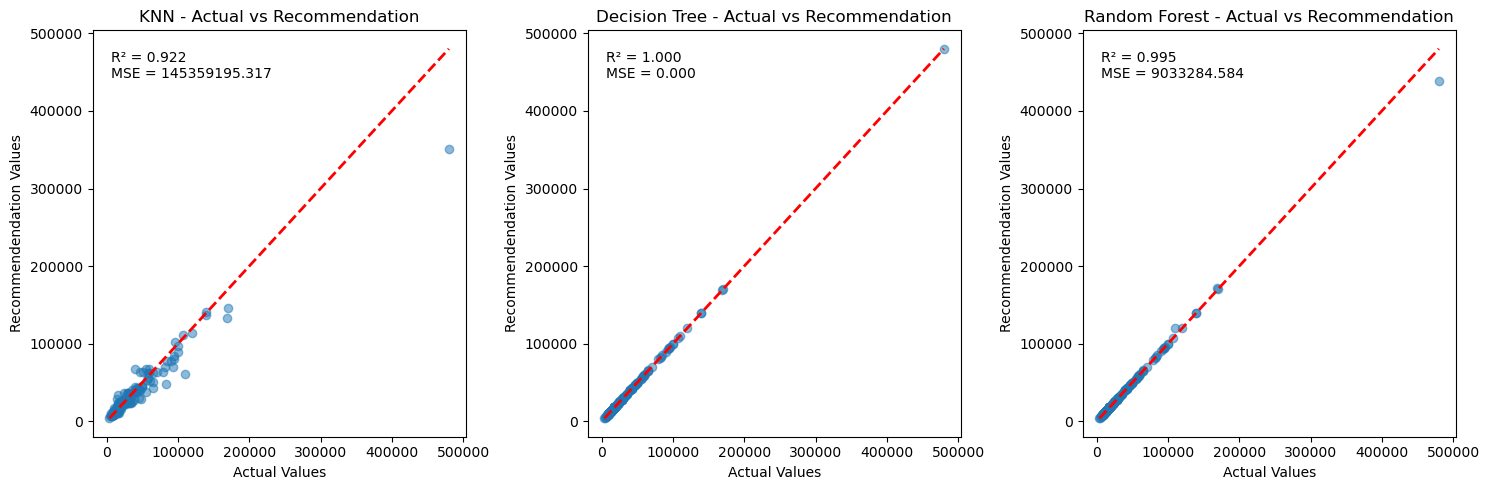

In [299]:
# 1. Actual vs Recommendation Scatter Plots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
models = [('KNN', y_pred_knn), ('Decision Tree', y_pred_tree), ('Random Forest', y_pred_rf)]

for idx, (name, y_pred) in enumerate(models):
    axes[idx].scatter(y_test, y_pred, alpha=0.5)
    axes[idx].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual Values')
    axes[idx].set_ylabel('Recommendendation Values')
    axes[idx].set_title(f'{name} - Actual vs Recommendation')
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    axes[idx].text(0.05, 0.95, f'R² = {r2:.3f}\nMSE = {mse:.3f}', 
                   transform=axes[idx].transAxes, verticalalignment='top')

plt.tight_layout()
plt.show()


Method 3: Compare all models


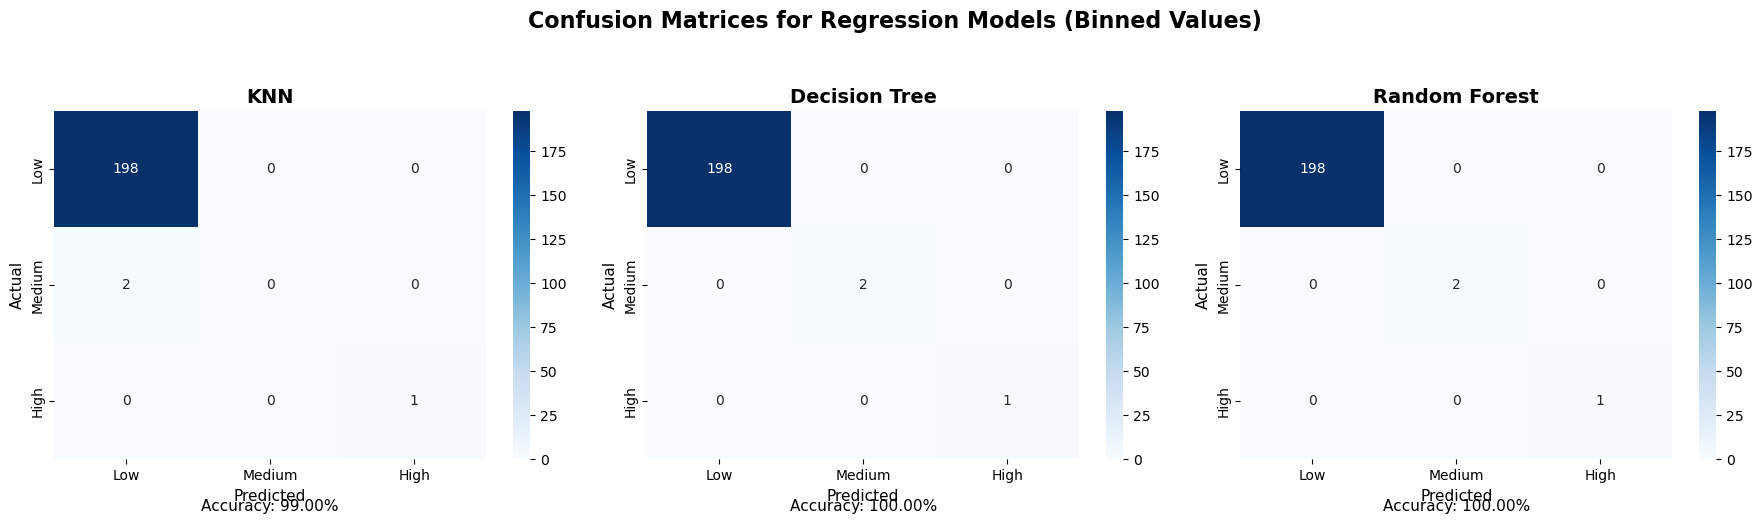

In [391]:
# confusion matrices
print("\nMethod 3: Compare all models")
plot_all_confusion_matrices(y_test, y_pred_knn, y_pred_tree, y_pred_rf)



In [379]:
print(data.columns)

Index(['id', 'brand', 'model', 'price', 'ram', 'storage', 'battery',
       'camera_score', 'performance_score', 'display_size', 'refresh_rate',
       'weight', 'rating'],
      dtype='object')


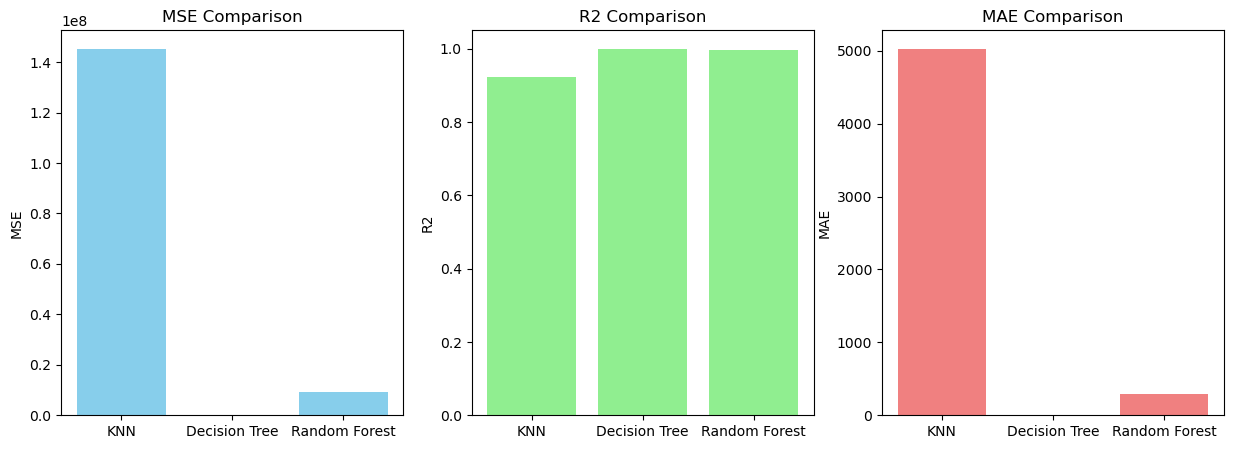

In [358]:
# Create bar plots for comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
metric_names = ['MSE', 'R2', 'MAE']
colors = ['skyblue', 'lightgreen', 'lightcoral']

for idx, metric in enumerate(metric_names):
    values = [metrics_comparison[model][metric] for model in ['KNN', 'Decision Tree', 'Random Forest']]
    bars = axes[idx].bar(['KNN', 'Decision Tree', 'Random Forest'], values, color=colors[idx])
    axes[idx].set_title(f'{metric} Comparison')
    axes[idx].set_ylabel(metric)

In [405]:

#  LOAD OR CREATE SMARTPHONE DATASET
+






 Smartphone Dataset Created!
Total smartphones: 200

First 10 smartphones:
   id    brand            model   price  rating
0   1     Vivo     Vivo Plus 14   35795     4.4
1   2  OnePlus  OnePlus Lite 14   80263     5.0
2   3    Apple    Apple Edge 13   73707     5.0
3   4  OnePlus  OnePlus Mini 11  143855     5.0
4   5  OnePlus  OnePlus Mini 13   28792     3.9
5   6     Vivo      Vivo Max 11   68555     5.0
6   7  OnePlus  OnePlus Mini 13   60757     5.0
7   8    Apple    Apple Lite 14  109789     5.0
8   9    Apple    Apple Plus 12   58044     4.6
9  10    Apple    Apple Mini 10   53159     4.3
